In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the API key
from api_keys import alpha_vantage_api_key, bls_api_key, fred_api_key


# https://cran.r-project.org/web/packages/eFRED/vignettes/FetchingDataFromFRED.html
# https://pypi.org/project/fredapi/
from fredapi import Fred

In [16]:
# Nasdaq Monthly Profit dataFrame
import yfinance as yf
import pandas as pd
import calendar

stock_data = yf.download('QQQ', start='2014-01-01', end='2019-12-31', progress=False).reset_index()

# Date, Month Column creation by using Date
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month_Number'] = stock_data['Date'].dt.month

# Open price for each Year, Month & Close price for each Year, Month
monthly_data = stock_data.groupby(['Year', 'Month_Number'])
first_open = monthly_data['Open'].first().reset_index()
last_close = monthly_data['Close'].last().reset_index()

# Monthly Profit 
monthly_profit = last_close['Close'] - first_open['Open']

# dataFrame creation
monthly_profit_df = pd.DataFrame({
                                    'Year': first_open['Year'],
                                    'Month_Number': first_open['Month_Number'],
                                    'Monthly_Profit': monthly_profit
                                })



# Generate month numbers (1-12)
month_numbers = list(range(1, 13))

# Use list comprehension to map month numbers to month names
month_names = [calendar.month_name[month] for month in month_numbers]

# Create the DataFrame
month_df = pd.DataFrame({
                            'Month_Number': month_numbers,
                            'Month': month_names
                        })

# Merge the DataFrames on 'Month' from monthly_profit_df and 'Month Number' from month_df
monthly_profit_merge_df = pd.merge(monthly_profit_df, month_df, left_on='Month_Number', right_on='Month_Number', how='left')

monthly_profit_final_df = monthly_profit_merge_df[["Year", "Month", "Monthly_Profit"]]
monthly_profit_final_df["Year"] = monthly_profit_final_df["Year"].astype('str')

monthly_profit_final_df

C:\Users\ZZ04DI616\AppData\Local\Temp\ipykernel_27424\747629373.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_profit_final_df["Year"] = monthly_profit_final_df["Year"].astype('str')


,Year,Month,Monthly_Profit
0,2014,January,-1.280006
1,2014,February,4.229996
2,2014,March,-1.820000
3,2014,April,-0.709999
4,2014,May,3.779999
...,...,...,...
67,2019,August,-3.959991
68,2019,September,2.589996
69,2019,October,7.580002
70,2019,November,7.170013


In [6]:
# 2 Year Treasury Bond Monthly change dataFrame -1
# Initialize the FRED API key
fred = Fred(api_key=fred_api_key)

# Fetch data for the US 2-Year Treasury Bond Rate
series_id = 'DGS2'  # Series ID for the US 2-Year Treasury Bond Rate
Year2BondRate_Data = fred.get_series(series_id, observation_start='2014-01-01', observation_end='2019-12-31')

# Convert the series data into a DataFrame
Year2BondRate_Data_df = pd.DataFrame(Year2BondRate_Data, columns=['Rate'])
Year2BondRate_Data_df.reset_index(inplace=True)
Year2BondRate_Data_df.columns = ['Date', 'Rate']

# Extract 'Year' and 'Month' from 'Date'
Year2BondRate_Data_df['Year'] = Year2BondRate_Data_df['Date'].dt.year
Year2BondRate_Data_df['Month'] = Year2BondRate_Data_df['Date'].dt.strftime('%B')  # Convert date to month name

# Optionally, rearrange columns if needed
Year2BondRate_Data_df = Year2BondRate_Data_df[['Year', 'Month', 'Date', 'Rate']]

# Convert 'Rate' to float, handle non-numeric issues
Year2BondRate_Data_df['Rate'] = pd.to_numeric(Year2BondRate_Data_df['Rate'], errors='coerce')
Year2BondRate_Data_df['Year'] = Year2BondRate_Data_df['Year'].astype('str')

# Print the DataFrame
Year2BondRate_Data_df


,Year,Month,Date,Rate
0,2014,January,2014-01-01,NaN
1,2014,January,2014-01-02,0.39
2,2014,January,2014-01-03,0.41
3,2014,January,2014-01-06,0.40
4,2014,January,2014-01-07,0.40
...,...,...,...,...
1560,2019,December,2019-12-25,NaN
1561,2019,December,2019-12-26,1.64
1562,2019,December,2019-12-27,1.59
1563,2019,December,2019-12-30,1.58


In [15]:
# 2 Year Treasury Bond Monthly change dataFrame -2
Year2BondRate_monthly_data = Year2BondRate_Data_df.groupby(['Year', 'Month'])
first_rate = Year2BondRate_monthly_data['Rate'].first().reset_index()
last_rate = Year2BondRate_monthly_data['Rate'].last().reset_index()

# Monthly Change for 2 Year Treasury Bond
Year2Bond_Monchng = last_rate['Rate'] - first_rate['Rate']

# dataFrame creation
Year2Bond_Monchng_df = pd.DataFrame({
                                    'Year': first_rate['Year'],
                                    'Month': first_rate['Month'],
                                    'Monthly_Change': Year2Bond_Monchng
                                   })
Year2Bond_Monchng_df

,Year,Month,Monthly_Change
0,2014,April,-0.02
1,2014,August,0.01
2,2014,December,0.18
3,2014,February,0.03
4,2014,January,-0.05
...,...,...,...
67,2019,March,-0.28
68,2019,May,-0.36
69,2019,November,0.05
70,2019,October,-0.04


In [17]:
# Merge two dataFrame (Nasdaq Monthly profit + 2 Year Treasury Bond Monthly change)

MonthlyProfit_2YearBond_df = pd.merge(monthly_profit_final_df, Year2Bond_Monchng_df, on= ["Year","Month"], how="inner")

MonthlyProfit_2YearBond_df

,Year,Month,Monthly_Profit,Monthly_Change
0,2014,January,-1.280006,-0.05
1,2014,February,4.229996,0.03
2,2014,March,-1.820000,0.12
3,2014,April,-0.709999,-0.02
4,2014,May,3.779999,-0.04
...,...,...,...,...
67,2019,August,-3.959991,-0.23
68,2019,September,2.589996,0.16
69,2019,October,7.580002,-0.04
70,2019,November,7.170013,0.05


<Axes: xlabel='Monthly_Change', ylabel='Monthly_Profit'>

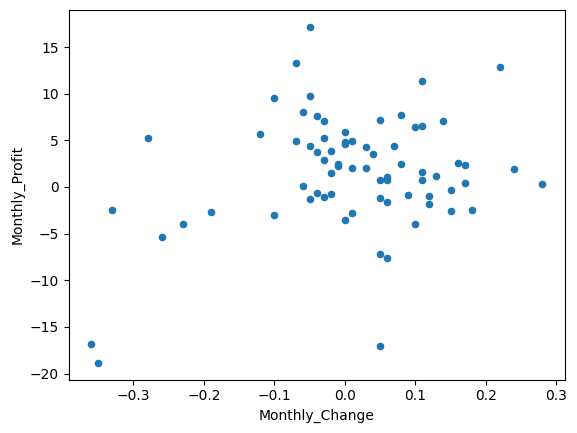

In [18]:
MonthlyProfit_2YearBond_df.plot(kind='scatter', x='Monthly_Change', y='Monthly_Profit')

C:\Users\ZZ04DI616\AppData\Local\Temp\ipykernel_27424\890818101.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  MonthlyProfit_2YearBond_df['Date'] = pd.to_datetime(MonthlyProfit_2YearBond_df['Year'].astype(str) + ' ' + MonthlyProfit_2YearBond_df['Month'])


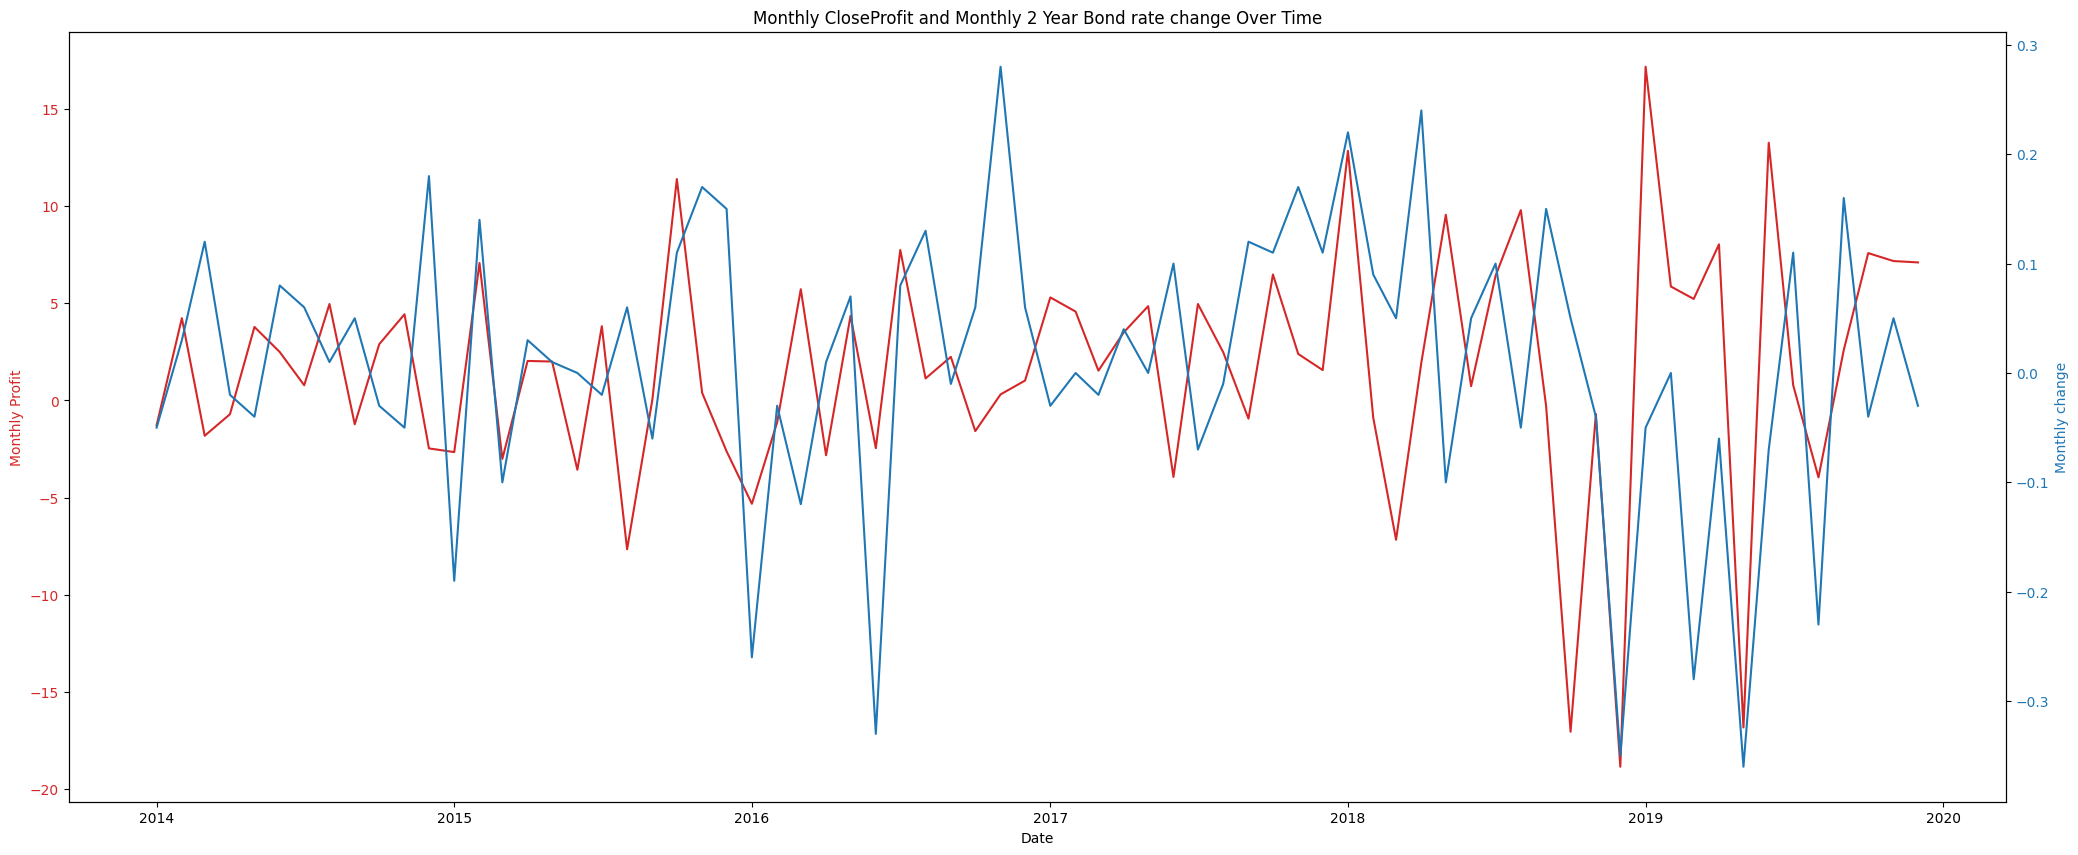

In [24]:
# Combine 'Year' and 'Month' into a 'Date' for plotting
MonthlyProfit_2YearBond_df['Date'] = pd.to_datetime(MonthlyProfit_2YearBond_df['Year'].astype(str) + ' ' + MonthlyProfit_2YearBond_df['Month'])

# Plotting
fig, ax1 = plt.subplots(figsize=(25,10))

# Create first plot - Monthly Close
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Profit', color=color)
ax1.plot(MonthlyProfit_2YearBond_df['Date'], MonthlyProfit_2YearBond_df['Monthly_Profit'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the Rate data
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Monthly change', color=color)  
ax2.plot(MonthlyProfit_2YearBond_df['Date'], MonthlyProfit_2YearBond_df['Monthly_Change'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.title('Monthly CloseProfit and Monthly 2 Year Bond rate change Over Time')
plt.show()